# Insurance Claim Severity

### Introduction

When you’ve been devastated by a serious car accident, your focus is on the things that matter the most: family, friends, and other loved ones. Pushing paper with your insurance agent is the last place you want your time or mental energy spent. This is why Allstate, a personal insurer in the United States, is interested in leveraging data science to predict the severity and the cost of insurance claims post an unforeseen event.

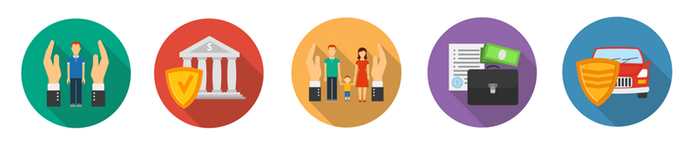

In this machine learning project we will predict how severe insurance claims will be for AllState. We accomplish this using   the CRISP-DM methodology. CRISP-DM stands for cross-industry process for data mining. The CRISP-DM methodology provides a structured approach to planning a data mining project.

The CRISP-DM consists 6 phases:

1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Model Data
5. Results
6. Deploy

Throughout this Notebook we will go through each of the phases.

### Business Understanding 

- Predict what kind of claims an insurance company will get.
- Predict how severe insurance claims will be for AllState
- How severe is an insurance claim?
- Create an algorithm which accurately predicts claims severity

### Data Understanding 

The data we will be using is the AllState claims severity dataset available on Kaggle. https://www.kaggle.com/c/allstate-claims-severity/data

##### Import the packages

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import math
import pickle
import csv

#modify the display options to view entire dataframe
pd.options.display.max_columns = None

In [2]:
# load the training data
train = pd.read_csv("train.csv")

In [3]:
# Analyze the size of training data
train.shape

(188318, 132)

In [4]:
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


Data has 188,318 rows and 132 columns

In [5]:
#Verify the first few observations
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [6]:
# Check the column headers
column_names = np.array(train.columns)
print(column_names)

['id' 'cat1' 'cat2' 'cat3' 'cat4' 'cat5' 'cat6' 'cat7' 'cat8' 'cat9'
 'cat10' 'cat11' 'cat12' 'cat13' 'cat14' 'cat15' 'cat16' 'cat17' 'cat18'
 'cat19' 'cat20' 'cat21' 'cat22' 'cat23' 'cat24' 'cat25' 'cat26' 'cat27'
 'cat28' 'cat29' 'cat30' 'cat31' 'cat32' 'cat33' 'cat34' 'cat35' 'cat36'
 'cat37' 'cat38' 'cat39' 'cat40' 'cat41' 'cat42' 'cat43' 'cat44' 'cat45'
 'cat46' 'cat47' 'cat48' 'cat49' 'cat50' 'cat51' 'cat52' 'cat53' 'cat54'
 'cat55' 'cat56' 'cat57' 'cat58' 'cat59' 'cat60' 'cat61' 'cat62' 'cat63'
 'cat64' 'cat65' 'cat66' 'cat67' 'cat68' 'cat69' 'cat70' 'cat71' 'cat72'
 'cat73' 'cat74' 'cat75' 'cat76' 'cat77' 'cat78' 'cat79' 'cat80' 'cat81'
 'cat82' 'cat83' 'cat84' 'cat85' 'cat86' 'cat87' 'cat88' 'cat89' 'cat90'
 'cat91' 'cat92' 'cat93' 'cat94' 'cat95' 'cat96' 'cat97' 'cat98' 'cat99'
 'cat100' 'cat101' 'cat102' 'cat103' 'cat104' 'cat105' 'cat106' 'cat107'
 'cat108' 'cat109' 'cat110' 'cat111' 'cat112' 'cat113' 'cat114' 'cat115'
 'cat116' 'cont1' 'cont2' 'cont3' 'cont4' 'cont5' 'cont

- __id__ is the ID column
- __cat1__ - __cat116__ are caegorical variables
- __cont1__ - __cont14__ are continuous variables
- __loss__ our dependent variable

In [7]:
# Dependent variable
train["loss"]

0         2213.18
1         1283.60
2         3005.09
3          939.85
4         2763.85
           ...   
188313    1198.62
188314    1108.34
188315    5762.64
188316    1562.87
188317    4751.72
Name: loss, Length: 188318, dtype: float64

This is the variable we want to predict using all the other variables

#### EDA for Categorical variables
###### Identify and split data based on data types(categorical vs continuous) to check the data distribution


In [8]:
column_datatypes = train.dtypes # extracting data type
# filter based on data types
categorical_columns = list(column_datatypes[column_datatypes=="object"].index.values)
continuous_columns = list(column_datatypes[column_datatypes=="float64"].index.values)
# remove "loss" our dependent variable
continuous_columns.remove('loss') 

###### check distribution of categorical variables

In [9]:
def category_distribution(train,categorical_columns):
    """
    category_distribution takes two arguments:
    train -- the training dataset
    categorical_columns -- list of categorical columns
    check the distribution of values in categorical columns

    """
    categorical_column_distribution = list()
    for cat_column in categorical_columns:
        categorical_column_distribution.append(train[cat_column].value_counts())
    return(categorical_column_distribution)

In [10]:
categorical_column_distribution = category_distribution(train,categorical_columns)

In [11]:
categorical_column_distribution

[A    141550
 B     46768
 Name: cat1, dtype: int64, A    106721
 B     81597
 Name: cat2, dtype: int64, A    177993
 B     10325
 Name: cat3, dtype: int64, A    128395
 B     59923
 Name: cat4, dtype: int64, A    123737
 B     64581
 Name: cat5, dtype: int64, A    131693
 B     56625
 Name: cat6, dtype: int64, A    183744
 B      4574
 Name: cat7, dtype: int64, A    177274
 B     11044
 Name: cat8, dtype: int64, A    113122
 B     75196
 Name: cat9, dtype: int64, A    160213
 B     28105
 Name: cat10, dtype: int64, A    168186
 B     20132
 Name: cat11, dtype: int64, A    159825
 B     28493
 Name: cat12, dtype: int64, A    168851
 B     19467
 Name: cat13, dtype: int64, A    186041
 B      2277
 Name: cat14, dtype: int64, A    188284
 B        34
 Name: cat15, dtype: int64, A    181843
 B      6475
 Name: cat16, dtype: int64, A    187009
 B      1309
 Name: cat17, dtype: int64, A    187331
 B       987
 Name: cat18, dtype: int64, A    186510
 B      1808
 Name: cat19, dtype: int64, A

In [12]:
length_categorical_columns = list(map(lambda x:len(x),categorical_column_distribution))
    
#     map function takes 2 argument: 
#     take the first function as the first parameter and 
#     the data structure on which we should execute the function as the second parameter 

In [13]:
# give the length of each categorical variable
length_categorical_columns

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 8,
 7,
 8,
 7,
 5,
 7,
 5,
 8,
 7,
 5,
 16,
 15,
 19,
 9,
 13,
 17,
 20,
 17,
 20,
 11,
 84,
 131,
 16,
 51,
 61,
 19,
 23,
 326]

In [14]:
# Group alltogether to find the frequency
# count the number of columns having the same number of unique values
distribution_dict = dict() # create a dictionary
for val in length_categorical_columns:
    if val in distribution_dict.keys():
        count = distribution_dict[val]
        distribution_dict[val] = count+1
    else:
        distribution_dict[val]=1

In [15]:
distribution_dict

{2: 72,
 3: 4,
 4: 12,
 8: 3,
 7: 4,
 5: 3,
 16: 2,
 15: 1,
 19: 2,
 9: 1,
 13: 1,
 17: 2,
 20: 2,
 11: 1,
 84: 1,
 131: 1,
 51: 1,
 61: 1,
 23: 1,
 326: 1}

##### Data Visualization

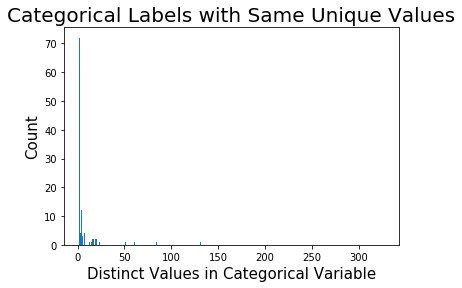

In [16]:
#plot showing the count of columns having same number of unique values
keys = distribution_dict.keys()
values = distribution_dict.values()
plt.bar(keys, values,width=0.8)
plt.xlabel('Distinct Values in Categorical Variable', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Categorical Labels with Same Unique Values',fontsize=20)
plt.rcParams['figure.figsize'] = [48/2.54, 10/2.54]
plt.show()

From the plot, we can see that most of the categorical variable are having a value of 2 and there are few categorical variables with higher values

#### EDA for continous variables
##### check the distribution of continuous variables

In [17]:
#filter out the continous columns and view the descriptive statistics
train[continuous_columns].describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848


### Prepare Data

#### Data cleaning and pre-processing

In [18]:
#Check if there is any missing value in the columuns
#value of 0 indicates no missing values
missing_values = train.isnull().sum()
np.max(missing_values)

0

In [19]:
#Manually insert a blank value across 5 rows
total_rows = train.shape[0]
columns_with_blanks_cat = np.random.randint(1,116,2)
columns_with_blanks_cont = np.random.randint(117,130,3)
columns_with_blank = np.append(columns_with_blanks_cat,columns_with_blanks_cont)

#for every column insert 5 blanks at random locations
for col in columns_with_blank:
    rows_with_blanks = np.random.randint(1,total_rows,5)
    train.iloc[rows_with_blanks,col] = np.nan

In [20]:
#Validate the number of columns with missing values
missing_values = train.isnull().sum()
np.max(missing_values)

5

In [21]:
#Displaying the columns with missing values
columns_with_missing = train.columns[train.isnull().any()]
print(columns_with_missing)

Index(['cat10', 'cat20', 'cont4', 'cont10', 'cont12'], dtype='object')


##### Handling of Outliers

In [22]:
class Data_preprocessing:
    """
    Data Preprocessing class with the following functions:
    
    missing_value_continuous: function to handle missing values of continuous variables
    missing_value_categorical: function to handle missing values of categorical variables
    outlier_treatment: function to handle continuous outliers in the dataset

    """
    def __init__(self,train):
        self.train = train
    
    def missing_value_continuous(self,column_names_with_specific_type,imputation_type="mean"):
        """
        function to handle missing values of continuous variables
        
        """
        if imputation_type=="mean":
            mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
            mean_imputer.fit(self.train[column_names_with_specific_type])
            self.train[column_names_with_specific_type]=mean_imputer.transform(self.train[column_names_with_specific_type])
        if imputation_type=="median":
            median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
            median_imputer.fit(self.train[column_names_with_specific_type])
            self.train[column_names_with_specific_type]=median_imputer.transform(self.train[column_names_with_specific_type])
        return self.train
    
    def missing_value_categorical(self,column_names_with_specific_type,imputation_type="most_frequent"):
        """
        function to handle missing values of categorical variables
        
        """
        most_frequent = SimpleImputer(strategy="most_frequent")
        most_frequent.fit(self.train[column_names_with_specific_type])
        self.train[column_names_with_specific_type] = most_frequent.transform(train[column_names_with_specific_type])
        return self.train
    
    def outlier_treatment(self,Q1,Q3,IQR,columns_with_outlier,action):
        """
        function to handle continuous outliers in the dataset
        
        """
        if action=="median":
            for i in range(len(columns_with_outlier)):
                column_name = columns_with_outlier[i]
                meadian_outlier = np.median(self.train[column_name])
                self.train.loc[self.train[((self.train[column_name]<(Q1[column_name]-(1.5*IQR[column_name])))|(self.train[column_name]>(Q3[column_name]+(1.5*IQR[column_name]))))].index,column_name]=meadian_outlier
        if action=="mean":
            for i in range(len(columns_with_outlier)):
                column_name = columns_with_outlier[i]
                mean_outlier = np.mean(self.train[column_name])
                self.train.loc[self.train[((self.train[column_name]<(Q1[column_name]-(1.5*IQR[column_name])))|(self.train[column_name]>(Q3[column_name]+(1.5*IQR[column_name]))))].index,column_name]=mean_outlier
        if action=="remove":
            for i in range(len(columns_with_outlier)):
                column_name = columns_with_outlier[i]
                self.train = self.train[~((self.train[column_name]<(Q1[column_name]-(1.5*IQR[column_name])))|(self.train[column_name]>(Q3[column_name]+(1.5*IQR[column_name]))))]
        return self.train

In [23]:
Data_preprocessing_obj = Data_preprocessing(train)
train = Data_preprocessing_obj.missing_value_continuous(continuous_columns,"median")
train = Data_preprocessing_obj.missing_value_categorical(categorical_columns)

In [24]:
#Validate the number of columns with missing values
missing_values = train.isnull().sum()
np.max(missing_values)

0


#####  Detect and handle outliers in the dataset

Outliers are extreme values that deviate from the other observations in the data. They may indicate a variability in the measurement or might arise out of experimental errors. Basically, an observation which deviate from the overall pattern of values within a particular variable in the dataset.

 Many machine learning models are suseptible to outliers,if there are outliers the ML model will take them into considerations, thus degrading the performance of the model and increasing the error of the model.That's whythey need to be handled.

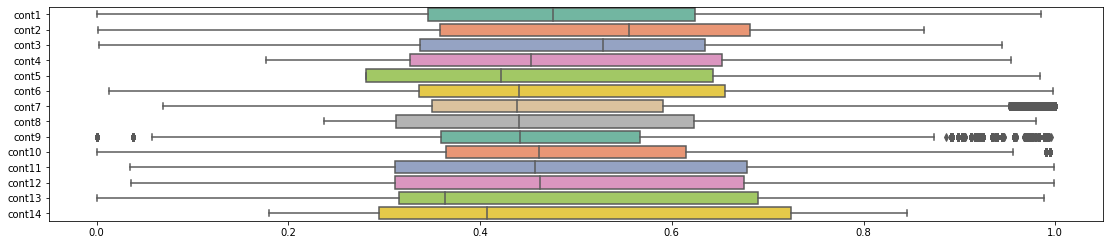

In [25]:
ax = sns.boxplot(data=train[continuous_columns], orient="h", palette="Set2")

From the whiskers of the boxplot above it can be seen that __cont7__, __cont9__ and __con10__ has outliers

In [26]:
columns_with_outlier = ['cont7','cont9','cont10']

In [27]:
#compute the interquartile range for all continuous columns
Q1 = train[continuous_columns].quantile(0.25)
Q3 = train[continuous_columns].quantile(0.75)
IQR = (Q3-Q1)
train = Data_preprocessing_obj.outlier_treatment(Q1,Q3,IQR,columns_with_outlier,"median")

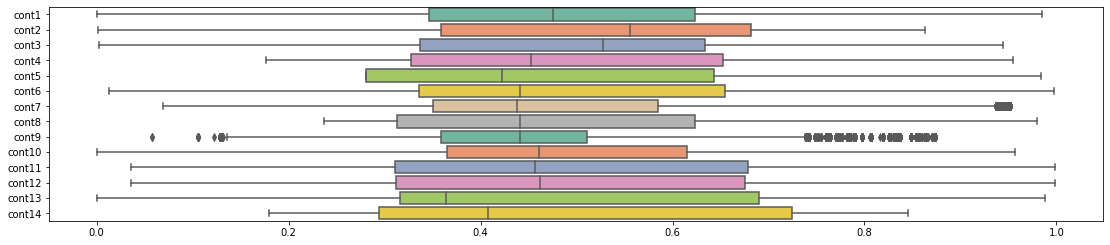

In [28]:
ax = sns.boxplot(data=train[continuous_columns], orient="h", palette="Set2")

Compared for the previous boxplot, the whiskers have shifted inside, there are still some but its more inline, we have been able to reduce the variability of the dataset

##### Feature elimination techniques for continuous and categorical features

###### Why feature selection?
1. Model interpretability become easier with less features
2. Easier to implement machine learning with few features
    - it takes much lesser time to train a model
3. Less features means less overfitting
    - overfitting - when model try hard to find pattern in the training dataset that it basically
      overfit when we test it on a test dataset i.e training error is very low but when 
      validation model on test dataset or unseen dataset error is very high
4. Help us remove redundant data 
5. Reduced features makes model less prone to error

__Univariate filter method (look at variable individually)__
- Constant variable is a technique where we tend to eliminate all those observations which are having the same value
- Quasi-constant features, as the name suggests, are the features that are almost constant. In other words, these features have the same values for a very large subset of the outputs. Such features are not very useful for making predictions. There is no rule as to what should be the threshold for the variance of quasi-constant features. However, as a rule of thumb, remove those quasi-constant features that have more than 99% similar values for the output observations.

__Multivariate method__
- Detecting correlation between variables in the dataset
    - correlation - indicates the extent to which two or more variables fluctuate in relation to each other
    - If 2 variables are correlated then adding such varialbe in the dataset do not tend to add much information as both are
      feeding simiar information and model will not be able to make judgement by taking both into consideration so it is best to 
      eliminate one of them and retain only one, it also help to stabilize the model and help it make better prediction

In [29]:
#Function for feature selection of numeric variables
#Remove variables with constant variance
#Remove variables with Quasi-Constant variance with a fixed threshold
#Remove correlated variables

def feature_selection_numerical_variables(train,qthreshold,corr_threshold,exclude_numerical_cols_list):
    """
    Function for feature selection of numeric variables, takes the following arguments:
    1. training data
    2. Quasi-Constant threshold - threshold we want to select to eliminate Quasi-Constant correlated variables
    3. correlation threshold - threshold on which we are focusing to elimitae variable which are correlated against each other
    4. a list - to exclude certain columns which we want to retain in the dataset
    
    """
    num_colums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numerical_columns = list(train.select_dtypes(include=num_colums).columns)
    numerical_columns = [column for column in numerical_columns if column not in exclude_numerical_cols_list]
    
    # features that we can eliminate from the dataset
    #remove variables with constant variance
    constant_filter = VarianceThreshold(threshold=0)
    constant_filter.fit(train[numerical_columns])
    constant_columns = [column for column in train[numerical_columns].columns 
                    if column not in train[numerical_columns].columns[constant_filter.get_support()]]
    if len(constant_columns)>0:
        train.drop(labels=constant_columns, axis=1, inplace=True)
        # if constant_column > 0, then there is constant variable in dataset and it will be drop

    #remove deleted columns from dataframe
    numerical_columns = [column for column in numerical_columns if column not in constant_columns]
        
    #remove variables with qconstant variance
    #Remove quasi-constant variables
    qconstant_filter = VarianceThreshold(threshold=qthreshold)
    qconstant_filter.fit(train[numerical_columns])
    qconstant_columns = [column for column in train[numerical_columns].columns 
                         if column not in train[numerical_columns].columns[constant_filter.get_support()]]
    if len(qconstant_columns)>0:
        train.drop(labels=qconstant_columns, axis=1, inplace=True)
    
    #remove deleted columns from dataframe
    numerical_columns = [column for column in numerical_columns if column not in qconstant_columns]
    
    
    #Identify and remove correlated variables
    correlated_features = set()
    correlation_matrix = train[numerical_columns].corr()
    ax = sns.heatmap(
    correlation_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right');
    #print(correlation_matrix)
    
    # eliminationg variable with correlation
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
                colname = correlation_matrix.columns[i]
                colcompared = correlation_matrix.columns[j]
                #check if the column compared against is not in the columns excluded list
                if colcompared not in correlated_features:
                    correlated_features.add(colname)
    train.drop(labels=correlated_features, axis=1, inplace=True)
    
    return train,constant_columns,qconstant_columns,correlated_features
    

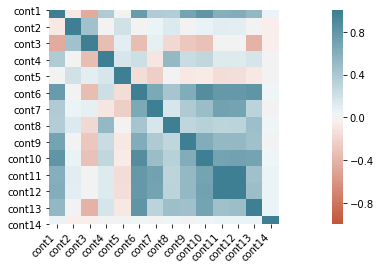

In [30]:
# passing variables and calling the function
train,constant_columns,qconstant_columns,correlated_features =feature_selection_numerical_variables(train,0.01,0.75,['loss','id'],)

- high correlation between __cont11__ and __cont12__
- high correlation between __cont10__ and __cont7__


In [31]:
# variables that have beeen eliminated
correlated_features

{'cont10', 'cont12', 'cont6'}

- __cont6__ high correlation with __cont11__, so __cont6__ has been removed
- __cont10__ high correlation with __cont1__ and __cont6__, so __cont10__ has been removed
- __cont12__ high correlation with __cont7__ and __cont13__, so __cont12__ has been removed


The variables has been removed because they are essentially feeding the same information to the dataset which other variables are feeding, so adding them in the model development will not add much information to the model

Now to decide in which variables to remove depend on business undertanding as well and the business need. If you want to keep certain variables in the dataset whicn wil be easier to explain to the business, then we would like to retain that and eliminate other variables which are correlated to it. 

##### Handling correlation between categorical variables


Machine learning models require all input and output variables to be numeric.
This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model.
- 2 types of features transformation:
    - 1. Label encoding - 
    - 2.One-hot Encoding



In [32]:
# save the encoders to disk to be fitted on test data
for cf1 in categorical_columns:
    le = LabelEncoder() # initialise 
    le.fit(train[cf1].unique())
    # filename is generated categorical name + .sav extension
    filename = cf1+".sav"
    # store as a pickle dump
    pickle.dump(le, open(filename, 'wb'))
    # transforation to training dataset
    train[cf1] = le.transform(train[cf1])

In [33]:
import os
os.getcwd()

'C:\\Users\\fbhug\\OneDrive\\Desktop\\claimsPrediction'

we use the fit function to every categorical variables then saving this file in a folder and then transoforming it

why saving file?
- whenever we want to fit a machine learning model in a real world dataset, we ought to have the function which were used to compute the encoding on the training dataset, so if we again fit the function on a test dataset, it might come up with different labels than what it has generated when running it on the training dataset.
To avoid this and assign the same value to a given category, we need to reuse the function that was kind of fit on the training dataset- we use the parameters rather which are fit on the trainig dataset.

In [34]:
#snippet to calculate the unique values with a categorical columns
df = pd.DataFrame(columns=["Column_Name","Count"])
for cat in categorical_columns:
    unique_value_count = len(train[cat].unique())
    df = df.append({'Column_Name': cat, "Count":int(unique_value_count)}, ignore_index=True)
columns_unique_value = np.array(df.Count.value_counts().index)

In [35]:
columns_unique_value
# an array with different unique values which are present in the dataFrame

array([  2,   4,   3,   7,   5,   8,  20,  19,  17,  16,   9, 326,  84,
        11,  61,  13,  15,  51,  23, 131], dtype=int64)

In [36]:
df

,Column_Name,Count
0,cat1,2
1,cat2,2
2,cat3,2
3,cat4,2
4,cat5,2
...,...,...
111,cat112,51
112,cat113,61
113,cat114,19
114,cat115,23


##### Chi-Square Test  

A Chi-Square test is a test of statistical significance for categorical variables.
- We start by defining the null hypothesis 
    - (H0) which states that there is no relation between the variables. 
    - An alternate hypothesis would state that there is a significant relation between the two.
we can verrify the hypothesis by using p-value
- We define a significance level to determine whether the relation between the variables is of considerable significance. Generally a significance factor or alpha value of 0.05 is chosen. This alpha value denotes the probability of erroneously rejecting H0 when it is true. A lower alpha value is chosen in cases where we expect more precision. If the p-value for the test comes out to be strictly greater than the alpha value, then H0 holds true. We cannot reject H0. 
- If p-value is less thant 0.05, then reject H0, there exist a relationship between the variable and one is dropped.

for more info(https://www.geeksforgeeks.org/python-pearsons-chi-square-test/)



In [37]:
#snippet to identify the dependent/correlated categorical variables and drop them
    # initialize 2 data structure: a set and a dictionary
        
columns_to_drop_cat = set()
correlated_columns = dict()
# find unique value in the array 'columns_unique_value'
for unique_value_count in columns_unique_value:
    if unique_value_count>1: # if >1 - no need to compute Chi-Square Test
        categorical_columns = df.loc[df.Count==unique_value_count,'Column_Name']
        categorical_columns = categorical_columns.reset_index(drop=True)
        columns_length=len(categorical_columns)
        for col in range(columns_length-1):
            column_to_compare = categorical_columns[col]
            columns_compare_against = categorical_columns[(col+1):columns_length]
            chi_scores = chi2(train[columns_compare_against],train[column_to_compare])
            if column_to_compare not in columns_to_drop_cat:
                # if chi_scores less than 0.05 then reject the null, there is relationship between variable
                columns_to_be_dropped = [i for i in range(len(columns_compare_against)) if chi_scores[1][i]<=0.05]
                #  if null rejected, add it to columns_to_drop_array 
                columns_to_drop_array = np.array(columns_compare_against)[columns_to_be_dropped]
                correlated_columns[column_to_compare]=columns_to_drop_array
                columns_to_drop_cat.update(columns_to_drop_array)

In [38]:
# columns that are correlated to other variables and can be dropped
columns_to_drop_cat

{'cat10',
 'cat106',
 'cat107',
 'cat11',
 'cat111',
 'cat114',
 'cat12',
 'cat13',
 'cat14',
 'cat16',
 'cat17',
 'cat18',
 'cat19',
 'cat2',
 'cat20',
 'cat21',
 'cat23',
 'cat24',
 'cat25',
 'cat26',
 'cat27',
 'cat28',
 'cat29',
 'cat3',
 'cat30',
 'cat31',
 'cat33',
 'cat34',
 'cat35',
 'cat36',
 'cat37',
 'cat38',
 'cat39',
 'cat4',
 'cat40',
 'cat41',
 'cat42',
 'cat43',
 'cat44',
 'cat45',
 'cat46',
 'cat47',
 'cat48',
 'cat49',
 'cat5',
 'cat50',
 'cat51',
 'cat52',
 'cat53',
 'cat54',
 'cat55',
 'cat56',
 'cat57',
 'cat58',
 'cat59',
 'cat6',
 'cat60',
 'cat61',
 'cat62',
 'cat63',
 'cat64',
 'cat65',
 'cat66',
 'cat67',
 'cat68',
 'cat69',
 'cat7',
 'cat70',
 'cat71',
 'cat72',
 'cat74',
 'cat76',
 'cat78',
 'cat79',
 'cat8',
 'cat80',
 'cat81',
 'cat82',
 'cat83',
 'cat84',
 'cat85',
 'cat86',
 'cat87',
 'cat9',
 'cat91',
 'cat92',
 'cat97',
 'cat98'}

In [39]:
# drop the correlated variabels
train = train.drop(columns_to_drop_cat,axis=1)

In [45]:
correlated_features = list(correlated_features)
columns_to_drop_cat = list(columns_to_drop_cat)
columns_to_drop_cat.extend(correlated_features)
columns_to_drop = columns_to_drop_cat.copy()

#output the columns_to_drop file to a csv
columns_to_drop_df=pd.DataFrame(columns_to_drop,columns=['colnames'])
columns_to_drop_df.to_csv("columns_to_drop.csv",index=False)

we maintain a file __columns_to_drop_df__ so that whenever we load a validation dataset or a new dataset, these columns can be directly dropped before generation prediction, as these columns we will no longer be using for building the ML models

##### Visualizing the Output Variable

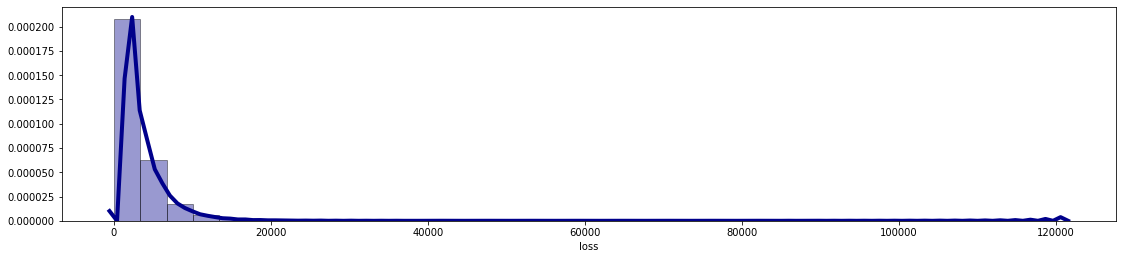

In [46]:
#Visualizing the distribution of loss value
# Density Plot and Histogram of loss
sns.distplot(train['loss'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Lot of observation with high value, long tail. We would like to bring those observations as close together as possible

In [47]:
# We will use a log transformation on the dependent variable to reduce the scale
train['loss'] = np.log(train['loss'])

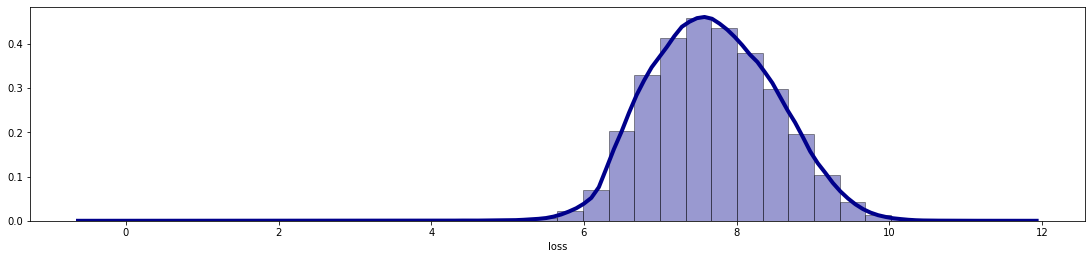

In [48]:
# Visualizing the distribution of loss value after log transformation
# Density Plot and Histogram of loss
sns.distplot(train['loss'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

We have been successfully able to narroww down the range

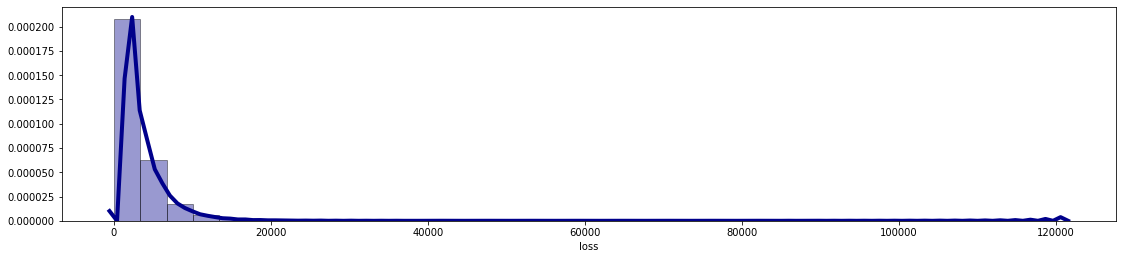

In [49]:
#taking a anti-log to transform the variable back to its original scale
sns.distplot(np.exp(train['loss']), hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

We need to make sure we are able to re transform the data to its original form and the present the result to the business user or else they will have a very hard time interpreting the "loss" ´(dependent variable):

### Data Modelling 

##### Fit an ML Model

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

To compute the Chi-Square Test previously, we have converted the categorical variables in to integers. Now when we are fitting it to the Random Forest; for the Random Forest to make the split, it basically takes into consideration the values which are present and it needs to treat the integers as categories, so that and not really a real number for deciding each split. So as to handle that we are converting the int64 columns back into categerocal variables. 

In [51]:
#convert the int64 columns categorical
Column_datatypes= train.dtypes
Integer_columns = list(Column_datatypes.where(lambda x: x =="int64").dropna().index.values)
train[Integer_columns] = train[Integer_columns].astype('category',copy=False)
X,y = train.drop(['id','loss'],axis=1),train['loss']
# dividing data into Train-Test Split
# 33% of the data we are using as the test set and rest in traing Ml model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Random Forest is a supervised learning algorithms, it can also be run into unsupervised setting as well but it is primarily used as supervised learning algorithm. It basically built decison trees internally and is often refers to as a forest because it is a combination of multiple decision trees and is usually train with a matter which is called bagging.

General idea of the bagging methodology is that a combination of learning models; it increases the overall result, it increases the overall accuracy of the model.

Random forest is a supervised learning algorithm. The "forest" it builds, is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

Put simply: random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

In [52]:
# Instantiate model with 100 decision trees
rf_base = RandomForestRegressor(n_estimators = 100, random_state = 42,oob_score = True)
rf_base.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=False)

In [53]:
#save the model output
pickle.dump(rf_base, open("basemodel_rf", 'wb'))

In [54]:
#load the saved model and predict on the test data
basedmodel_rf = pickle.load(open("basemodel_rf", 'rb'))

In [55]:
#validate the accuracy of the base model
#compare the model accuracies
Y_test_predict_base = basedmodel_rf.predict(X_test)
print("Base model accuracy:",np.sqrt(mean_squared_error(y_test, Y_test_predict_base)))

Base model accuracy: 0.6663960400547018


Basically using the RMSE to get the accuracy of the model.

One big advantage of random forest is that it can be used for both classification and regression problems

It consist a combination of hyperparameters - Random forest has nearly the same hyperparameters as a decision tree or a bagging classifier.
- Parameters are something which are learned when the model are being trained
- Hyperparameter are essentially varialbes which are passed as input in the model.

The Random Forest consists of a number of hyperparameters as seen in the below cells.

For deciding on the hyperparameters manually is very tedious.
- Two efficient methods
    - Grid Search 
        - In this method, each combination of hyperparameter value is tried. This makes the process time consuming, and lot of computation power or in short, inefficient.
    - Random Search 
        - Kind of modified version of GridSearch which works very well, although it will give accuracy slightly lower than GridSerach. In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.




###### HyperParameter Tuning Using RandomSearchCV

In [56]:
#number of trees
n_estimators = [100,200,300,400,500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [200,400,600]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [57]:
# Use the random grid to search for best hyperparameters
# base model to tune
rf = RandomForestRegressor()

# 5 fold cross validation, 
# search across 150 different combinations, and use all available cores
rf_tuned = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3,n_iter = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_tuned.fit(X_train, y_train)

#save the model output
pickle.dump(rf_tuned, open("tunedmodel_rf", 'wb'))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 35.3min finished


In [58]:
#check the best params
rf_tuned.best_params_

{'n_estimators': 200,
 'min_samples_split': 200,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

Bes parameter model:
- 200 trees

In [59]:
#load the saved model and predict on the test data
tunedmodel_rf = pickle.load(open("tunedmodel_rf", 'rb'))

Y_test_predict_tuned = tunedmodel_rf.predict(X_test)
print("Tuned model accuracy:",np.sqrt(mean_squared_error(y_test, Y_test_predict_tuned)))

Tuned model accuracy: 0.6523585521731234


#### GBM model

Gradient boosting algorithm

The Origin of Boosting
- The idea of boosting came out of the idea of whether a weak learner can be modified to become better.

In [61]:
from sklearn.ensemble import GradientBoostingRegressor  #GBM algorithm
gbm_base = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0)

gbm_base.fit(X_train,y_train)

#save the GBM model
pickle.dump(gbm_base, open("basemodel_GBM", 'wb'))

In [62]:
#load the saved model and predict on the test data
basemodel_GBM = pickle.load(open("basemodel_GBM", 'rb'))

Y_test_predict_tuned = basemodel_GBM.predict(X_test)
print("Base model GBM accuracy:",np.sqrt(mean_squared_error(y_test, Y_test_predict_tuned)))

Base model GBM accuracy: 0.70044181319114


### Evaluate Results

In [ ]:
#### Script to Predict the output on new observations

import pandas as pd
import pickle
import numpy as np

test_data = pd.read_csv("test_data_subset.csv")
test_data.head()

#load the columns to drop file
columns_to_drop=pd.read_csv("columns_to_drop.csv")
columns_to_Retain = set(test_data.columns.values) - set(columns_to_drop.colnames.values)
test_data = test_data[columns_to_Retain]

column_datatypes = test_data.dtypes
categorical_columns = list(column_datatypes[column_datatypes=="object"].index.values)

#Transfor the categorical columns by loading the fit encodings on training data

for cf1 in categorical_columns:
    filename = cf1+".sav"
    le = pickle.load(open(filename, 'rb'))
    
    #if an new classes is observed, set it to the 0 class
    le_dict = dict(zip(le.classes_, le.transform(le.classes_)))
    test_data[cf1]=test_data[cf1].apply(lambda x: le_dict.get(x, -1))

test_data_id = test_data['id']
test_data = test_data.drop('id',axis=1)

Column_datatypes= test_data.dtypes
Integer_columns = list(Column_datatypes.where(lambda x: x =="int64").dropna().index.values)
#convert the int64 columns categorical
test_data[Integer_columns] = test_data[Integer_columns].astype('category',copy=False)

#load the saved model and predict on the test data
tunedmodel_rf = pickle.load(open("tunedmodel_rf", 'rb'))

Y_test_predict = tunedmodel_rf.predict(test_data)
test_data['predict_loss']=Y_test_predict
test_data['id']=test_data_id
test_data = test_data[['id','predict_loss']]

test_data



###  Deployment

In [ ]:
from flask import Flask, request  # import main Flask Class and request
import pandas as pd
import pickle
import numpy as np
from pandas.io.json import json_normalize

app = Flask(__name__)  # create the Flask app


@app.route('/load_model', methods=['POST'])
def load_model():
    req_data = request.get_json()
    test_data_subset = pd.DataFrame.from_dict(json_normalize(req_data), orient='columns')

    # load the columns to drop file
    columns_to_drop = pd.read_csv("/model/columns_to_drop.csv")

    # select the columns to be retained
    columns_to_Retain = set(test_data_subset.columns.values) - set(columns_to_drop.colnames.values)
    test_data_selected_columns = test_data_subset[columns_to_Retain]

    # select the categorical columns from the dataframe
    column_datatypes = test_data_selected_columns.dtypes
    categorical_columns = list(column_datatypes[column_datatypes == "object"].index.values)

    # read the label encoders and apply the encoded values to the categorical variables
    for cf1 in categorical_columns:
        filename = "/model/" + cf1 + ".sav"
        le = pickle.load(open(filename, 'rb'))

        # if an new classes is observed, set it to the 0 class
        le_dict = dict(zip(le.classes_, le.transform(le.classes_)))
        test_data_selected_columns[cf1] = test_data_selected_columns[cf1].apply(lambda x: le_dict.get(x, -1))

    test_data_id = test_data_selected_columns['id']
    test_data_selected_columns = test_data_selected_columns.drop('id', axis=1)

    # convert the interger columns to categories as required by the ML model
    Column_datatypes = test_data_selected_columns.dtypes
    Integer_columns = list(Column_datatypes.where(lambda x: x == "int64").dropna().index.values)

    # convert the int64 columns categorical
    test_data_selected_columns[Integer_columns] = test_data_selected_columns[Integer_columns].astype('category',
                                                                                                     copy=False)

    # load the saved model and predict on the test data
    tuned_model = pickle.load(open("/model/tunedmodel_rf", 'rb'))
    Y_test_predict = tuned_model.predict(test_data_selected_columns)

    # create a new output dataframe
    output = pd.DataFrame()
    output['id'] = test_data_id
    output['predict_loss'] = Y_test_predict

    output = output.to_json(orient='records')
    return output


if __name__ == '__main__':
    app.run(debug=True, port=4000)  # run app in debug mode on port 4000

#### Installed packages

In [63]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
